Iteration no. 0 --- 0.015297174453735352 seconds --- 206 of stream length
Iteration no. 1 --- 0.0340123176574707 seconds --- 379 of stream length
Iteration no. 2 --- 0.023950576782226562 seconds --- 275 of stream length
Iteration no. 3 --- 0.008615732192993164 seconds --- 128 of stream length
Iteration no. 4 --- 0.0014586448669433594 seconds --- 8 of stream length
Iteration no. 5 --- 0.0009589195251464844 seconds --- 19 of stream length
Iteration no. 6 --- 0.011122941970825195 seconds --- 163 of stream length
Iteration no. 7 --- 0.01926898956298828 seconds --- 254 of stream length
Iteration no. 8 --- 0.016484498977661133 seconds --- 244 of stream length
Iteration no. 9 --- 0.05384421348571777 seconds --- 791 of stream length
Iteration no. 10 --- 0.011150598526000977 seconds --- 157 of stream length
Iteration no. 11 --- 0.005456209182739258 seconds --- 78 of stream length
Iteration no. 12 --- 0.02346062660217285 seconds --- 303 of stream length
Iteration no. 13 --- 0.009163856506347656 

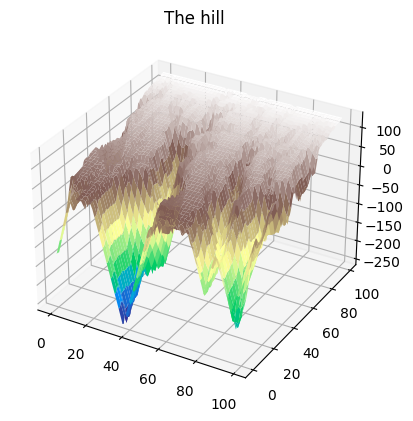

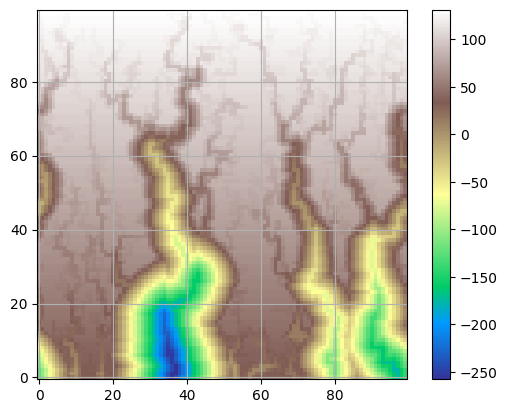

In [1]:
# modules

import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

# function to plot hills 

def plot_3D(hill, rivers = False):
    '''
    Just fast 3D plotting of a hill.
    '''
    X = np.arange(hill.shape[0])
    Y = np.arange(hill.shape[1])
    X, Y = np.meshgrid(X, Y)
    fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
    ax.plot_surface(X, Y, hill, cmap = "terrain")
    if rivers != False:
        rivers = np.empty(hill.shape)
        rivers[25:75, 25:75] = -100
        ax.plot_surface(X, Y, rivers, cmap = "terrain")
    plt.title("The hill")
    plt.show()

# define rain

moves = [np.array([0, 1]), np.array([1, 0]), np.array([-1, 0]), np.array([0, -1])]

def prob(h, beta):
    # h is height difference
    return np.exp(beta*h)

prob = np.vectorize(prob)

def single_stream(hill, beta = 0.5, max_length = 1000):
    '''
    Droplets fall with r increased, periodic boundaries for c. It does return a unique list with positions of droplets all way down.
    '''
    # create droplet
    nr, nc = hill.shape
    r = np.random.choice(nr)
    c = np.random.choice(nc)
    been_there = [(r, c)]
 
    # let it fall

    iter = 0
    while r != 0:
        iter += 1

        if iter > max_length:
            raise Exception("Woah!")

       # get list of neighbors' coordinates     

        neighbors = []
        for m in moves:
            neighbors.append(np.array([r, c]) + m)

        # differences of height with neighbors

        gradients = [] 
        borders = []
        for i, n in enumerate(neighbors):
            if n[0] == n_r:
                gradients.append(0)
                borders.append(i)
            else:
                gradients.append(+ hill[r, c] - hill[n[0], n[1]%n_c])

        # probabilities of going there

        probabilities = prob(np.array(gradients), beta = beta)
        for b in borders:
            probabilities[b] = 0
        probabilities = probabilities / np.sum(probabilities)
        idx = np.random.choice(4, p = probabilities)

        # the move

        move = moves[idx]
        r += move[0]
        c += move[1]

        # periodic transverse boundary

        c = c % n_c

        been_there.append((r, c))

    return set(been_there), iter

def avalanche(hill, R):
    '''
    Single avalanche acting inplace on cliffs higher than R. If more avalanches are needed, it returns "True".
    '''
    go_on = False
    diff_hills = []

    for i in range(4):
        diff_hill = hill - np.roll(hill.copy(), shift = moves[i], axis = [0, 1])    # create 4 "gradient hills"
        diff_hill[np.abs(diff_hill < R)] = 0                                        # zero them under some threshold

        if i == 2:                                                                  # fixing boundary on rows
            diff_hill[n_r-1, :] = 0                
        if i == 1:
            diff_hill[0, :] = 0

        diff_hills.append(diff_hill)

    for d in diff_hills:
        if np.any(d != 0):
            go_on = True
    
    for d in diff_hills:
        hill -= d/4

    return go_on

def gradient(hill, R):
    '''
    Function to plot gradient of a hill.
    '''                                  
    for i in range(4):
        diff_hill = hill - np.roll(hill.copy(), shift = moves[i], axis = [0, 1])    # create 4 "gradient hills"
        #diff_hill[np.abs(diff_hill < R)] = 0                                       # zero them under some threshold

        if i == 2:                                                                  # fixing boundary on rows
            diff_hill[n_r-1, :] = 0                
        if i == 1:
            diff_hill[0, :] = 0
        if np.any(diff_hill != 0):
            print(True)
        plt.imshow(diff_hill, cmap = "terrain", origin = "lower")
        plt.grid()
        plt.title(str(moves[i]))
        plt.colorbar()
        plt.show()


# initialize the hill

n_r = 100
n_c = 100

the_hill = np.empty([n_r, n_c])

for r in range(n_r):
    for c in range(n_r):
        the_hill[r, c] = r + np.random.rand()/1e4

# time loop

total_time = 300
delta = 3
mass = np.sum(the_hill)
failed = 0

for t in range(total_time):
    start_time = time.time()
    
    try:
        stream, it = single_stream(the_hill, 0.5, 4000)
    except:
        failed += 1
        continue
    
    for stone in stream:
        the_hill[stone[0], stone[1]] -= delta 
    print("Iteration no. {} --- {} seconds --- {} of stream length".format(t, time.time() - start_time, it))
    
    if t%10 == 0 or t == total_time-1:

        # conservation of mass
        current_mass = np.sum(the_hill)
        the_hill += (mass-current_mass)/(n_r*n_c)

        # avalanches
        go_on = True
        while go_on:
           go_on = avalanche(the_hill, 20)
           
print("Stream was way too long {} times.".format(failed))

# plot the results

plot_3D(the_hill)
plt.imshow(the_hill, cmap = "terrain", origin = "lower")
plt.grid()
plt.colorbar()
plt.show()

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
River was way too long 1144 times.


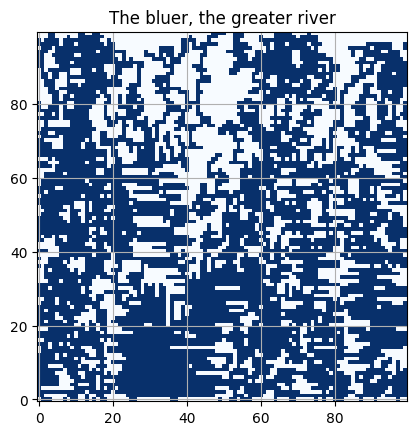

In [2]:
# find rivers

river_time = 3000
river_array = np.zeros(the_hill.shape)
failed = 0
for t in range(river_time):
    
    try:
        stream, it = single_stream(the_hill, 0.5, 1000)
    except:
        failed +=1
        continue
    
    for stone in stream:
        river_array[stone[0], stone[1]] += 1 
    
    if t%30 == 0:
        print(str(floor(t%30)) + "%")


print("River was way too long {} times.".format(failed))

river_array2 = river_array.copy()
river_array2[river_array < 5] = 0
river_array2[river_array > 0] = 1

plt.imshow(river_array2, cmap = "Blues", origin = "lower")
plt.grid()
plt.title("The bluer, the greater river")
plt.show()


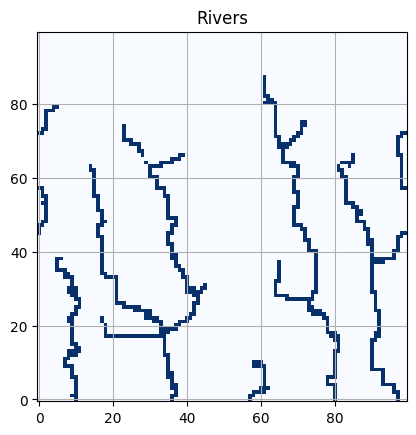

In [21]:
river_array2 = river_array.copy()
river_array2[river_array<30] = 0

river_array2[river_array2>11] = 1
plt.imshow(river_array2, cmap = "Blues", origin = "lower")
plt.grid()
plt.title("Rivers")
plt.show()